## Displaying original,grayscale and binary image

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

import os

Mounted at /content/gdrive


In [1]:
from __future__ import print_function
from __future__ import division

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

In [2]:
image = '/content/gdrive/Shareddrives/ComED Codes and Data/Dataset/Train/Copy of gsv_148.jpg'

input_image = cv.imread(image)
if input_image is None:
    print('Could not open image: ', input_image)
    exit(0)

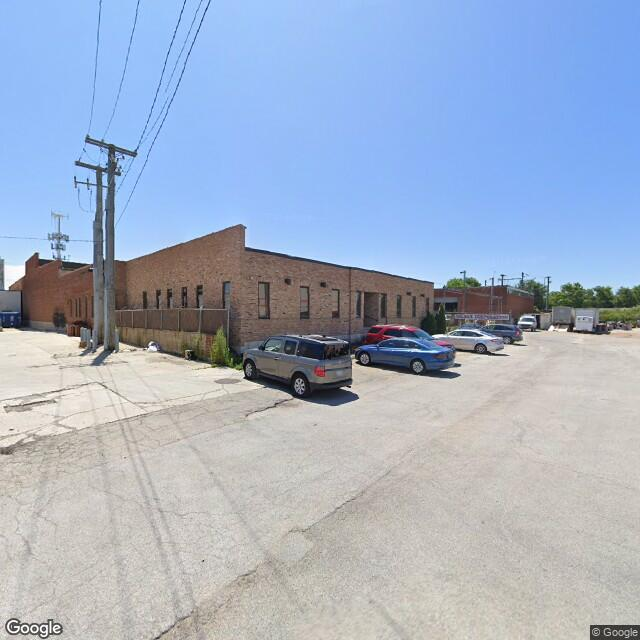

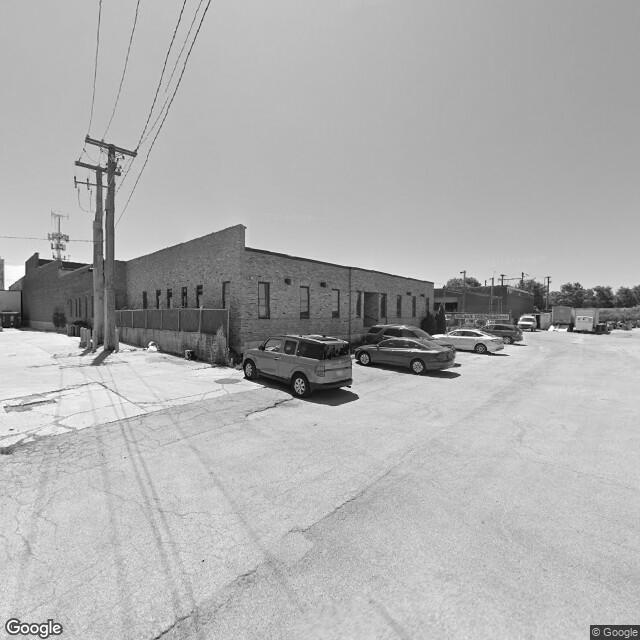

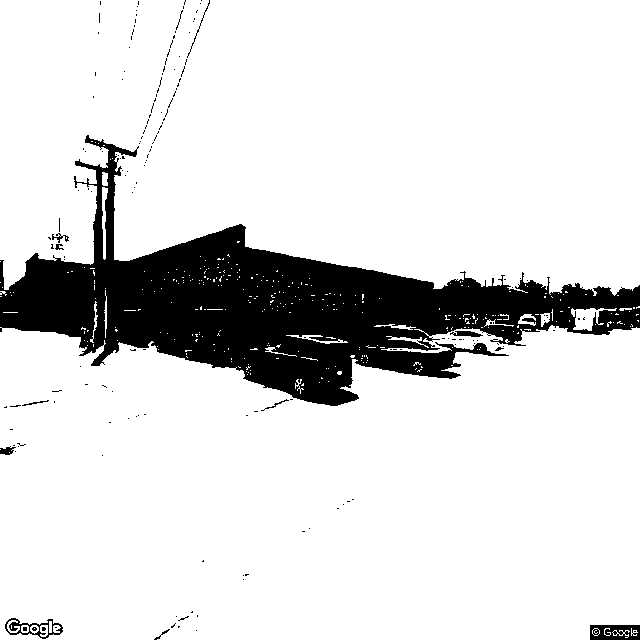

In [6]:
# Resize the image:
scale_percent = 100 # Percent of the original image
width = int(input_image.shape[0] * scale_percent / 100)
height = int(input_image.shape[1] * scale_percent / 100)
dim = (width, height)

resized_img = cv.resize(input_image, dim, interpolation=cv.INTER_AREA)

# Grayscale image:
gray = cv.cvtColor(input_image, cv.COLOR_BGR2GRAY)

# Thresholding image to render it in black and white:
(thresh, blackAndWhiteImage) = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)

# Displaying Original Image
cv2_imshow(input_image)

# Graysccale Version
cv2_imshow(gray)

# Binary Thresholded version
cv2_imshow(blackAndWhiteImage)

cv.waitKey(0)
cv.destroyAllWindows()

## Dividing into Red,Green, and Blue channels

In [8]:
# Splitting the Image into RGB Channels

blue, green, red = cv.split(input_image) # Splits a multi-dimensional array
print(blue.shape)
print(red.shape)
print(green.shape)


(640, 640)
(640, 640)
(640, 640)


In [9]:
# Upscaling each channel to 3-D

# Blue Rendering : [blue; 0; 0]
# Green Rendering: [0; green; 0]    
# Red Rendering: [0; 0; red]

# Create and 3-D dummy array

blue_channel = np.zeros(input_image.shape, input_image.dtype)
green_channel = np.zeros(input_image.shape, input_image.dtype)
red_channel = np.zeros(input_image.shape, input_image.dtype)


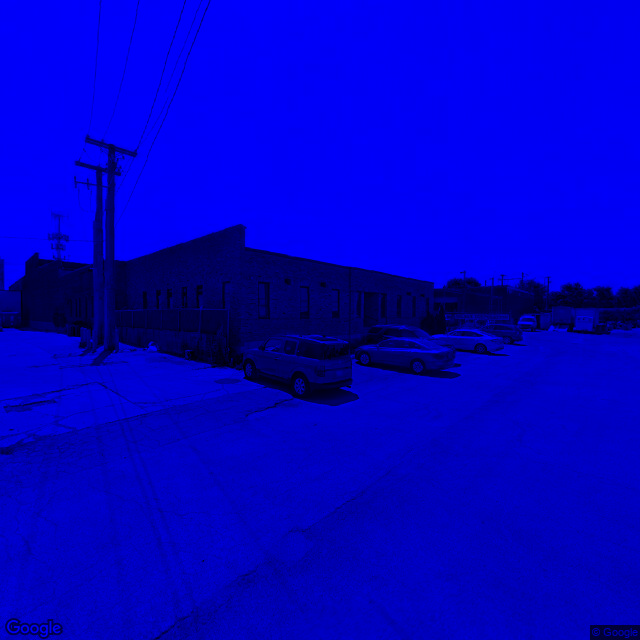

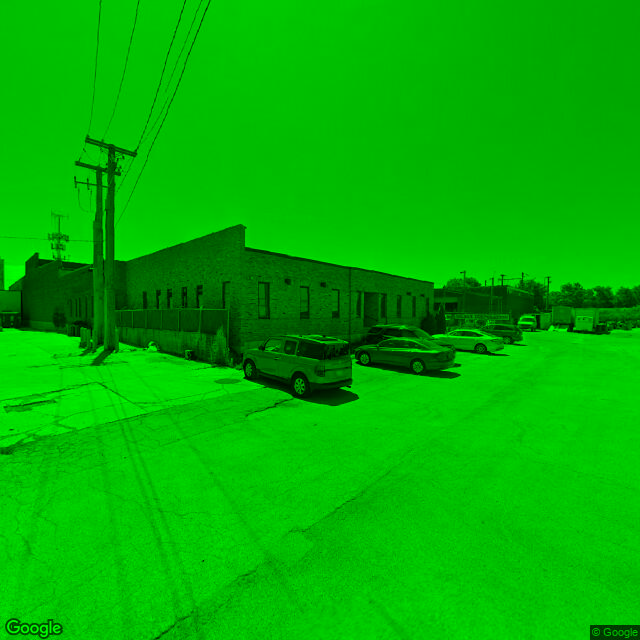

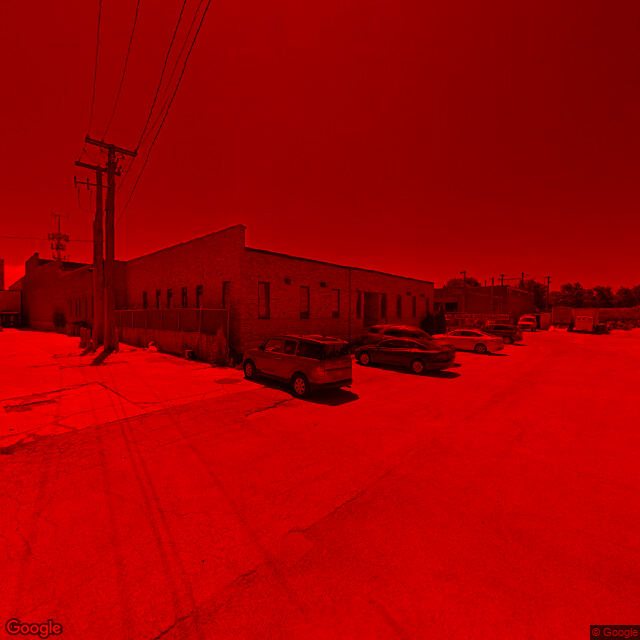

In [15]:

# mixchannel() merges different Channels

cv.mixChannels([blue, green, red], [blue_channel], [0,0])
cv.mixChannels([blue, green, red], [green_channel], [1,1])
cv.mixChannels([blue, green, red], [red_channel], [2,2])

# Display the three obtained images
cv2_imshow(blue_channel)
cv2_imshow(green_channel)
cv2_imshow(red_channel)

## Pixel Transform
The Simplest kind of operations applied to an image are those where the input is a pixel and the corresponding output is also a pixel. Point operators, otherwise named, are modeled as functions that take one or more input images and produces an output image.

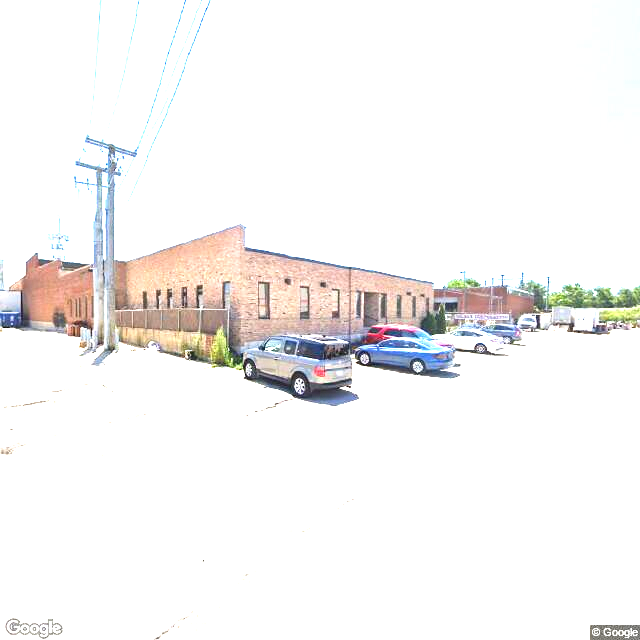

In [28]:
# Contrast & Brightness Adjustment

#New dummy image that will contain adjustments
new_image = np.zeros(input_image.shape, input_image.dtype)

# Defining alpha and beta:
alpha = 2.0   # Contrast parameter Control [1.0-3.0]
beta = 10    # Brightness  parameter Control [0-100]

# Scaling and converting the image contrast and brightness
new_image = cv.convertScaleAbs(input_image, alpha=alpha, beta=beta)

# Displaying the adusted image
cv2_imshow(new_image)

## Histogram Equalization
Plotting the pixel intensity distribution we can visualize the set of lightness values for an image.The real objective after is to find an automated process to equally distribute light across the entire image without having to check area by area, pixel by pixel

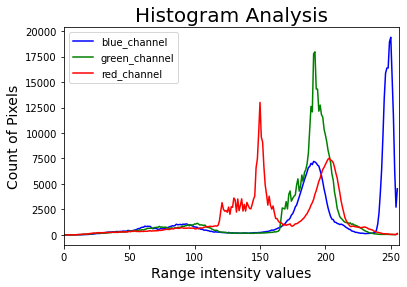

In [33]:
# setting RGB color list:
color = ('blue', 'green', 'red')

# Iterating throuhg each channel and plotting the corresponding result:
# using cv.calcHist() opencv method
for i,color in enumerate(color):
    histogram = cv.calcHist([input_image], [i], None, [256], [0, 256])
    cdf = histogram.cumsum()
    cdf_percent = cdf / cdf.max()
    plt.plot(histogram, color=color, label=color+'_channel')
    plt.xlim([0,256])

plt.title('Histogram Analysis',fontsize=20)
plt.xlabel('Range intensity values',fontsize=14)
plt.ylabel('Count of Pixels',fontsize=14)
plt.legend()
plt.show()

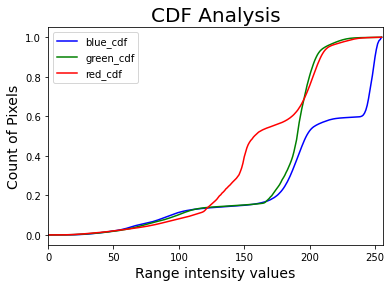

In [35]:
# setting RGB color list:
color = ('blue', 'green', 'red')

# Iterating throuhg each channel and plotting the corresponding result:
# using cv.calcHist() opencv method
for i,color in enumerate(color):
    histogram = cv.calcHist([input_image], [i], None, [256], [0, 256])
    cdf = histogram.cumsum()
    cdf_percent = cdf / cdf.max()
    plt.plot(cdf_percent, color=color, label=color+'_cdf')
    plt.xlim([0,256])

plt.title('CDF Analysis',fontsize=20)
plt.xlabel('Range intensity values',fontsize=14)
plt.ylabel('Count of Pixels',fontsize=14)
plt.legend()
plt.show()

We mask the Null values and apply equalisation to non masked values (y - y_min)*255 / (y_max - y_min)

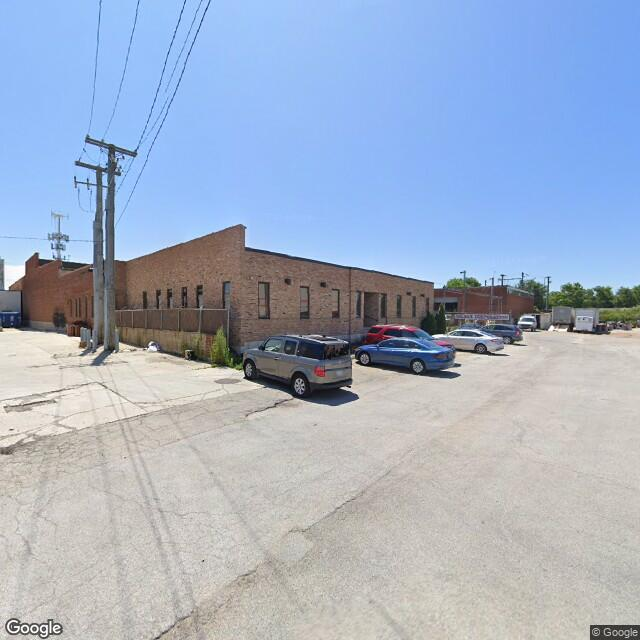

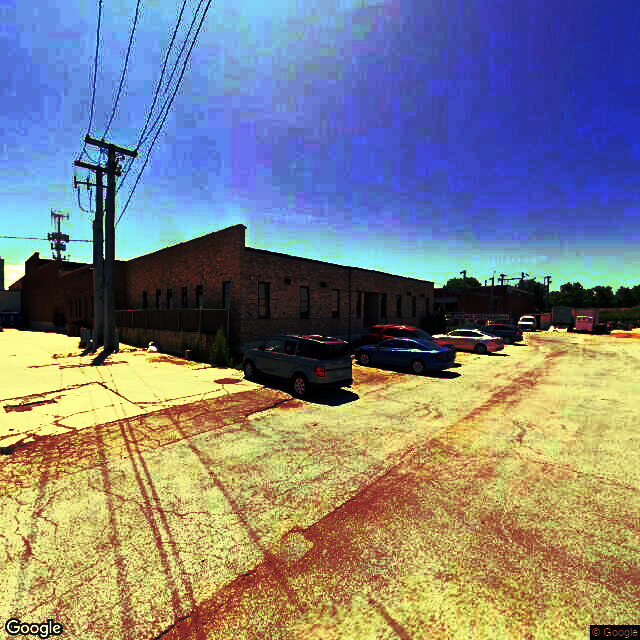

In [36]:
# Calculate the Cumulative Distribution Function:
blue, green, red = cv.split(input_image)

histogram_blue = cv.calcHist([blue], [0], None, [256], [0, 256])
histogram_green = cv.calcHist([green], [0], None, [256], [0, 256])
histogram_red = cv.calcHist([red], [0], None, [256], [0, 256])

# Calculate the CDF for each histogram channel
cdf_blue = histogram_blue.cumsum()
cdf_green = histogram_green.cumsum()
cdf_red = histogram_red.cumsum()

# Mask null values 
cdf_blue_masked = np.ma.masked_equal(cdf_blue, 0)
cdf_green_masked = np.ma.masked_equal(cdf_green, 0)
cdf_red_masked = np.ma.masked_equal(cdf_red, 0)

# Apply Equalization Formula to all none masked values: (y - ymin)*255 / (ymax - ymin)
cdf_blue_masked = (cdf_blue_masked - cdf_blue_masked.min())*255 / (cdf_blue_masked.max() - cdf_blue_masked.min())
cdf_green_masked = (cdf_green_masked - cdf_green_masked.min())*255 / (cdf_green_masked.max() - cdf_green_masked.min())
cdf_red_masked = (cdf_red_masked - cdf_red_masked.min())*255 / (cdf_red_masked.max() - cdf_red_masked.min())

final_b = np.ma.filled(cdf_blue_masked, 0).astype('uint8')
final_g = np.ma.filled(cdf_green_masked, 0).astype('uint8')
final_r = np.ma.filled(cdf_red_masked, 0).astype('uint8')

# Merge all channels:
blue_img = final_b[blue]
green_img = final_g[green]
red_img = final_r[red]

equalised_image = cv.merge((blue_img, green_img, red_img))

color = ('blue', 'green', 'red')

# Write/Output new equalized image:
cv2_imshow(input_image) # Original Image
cv2_imshow(equalised_image) # Equalized Image

##Convolutions

Collection of neighbourhood operators that manipulate local image area to to perfrom transformation we aim to achieve.

1. Image filtering (removinf noise, blurring. images)
2. Image gradient (edge and contour detection by laplcaian/sobel derivatives)

Laplacian Derivative

The Laplacian of an image highlights regions of rapid intensity change and it’s widely used as a prior step for edge detection. The operator normally takes a single grayscale image as input and generates another grayscale image as output.

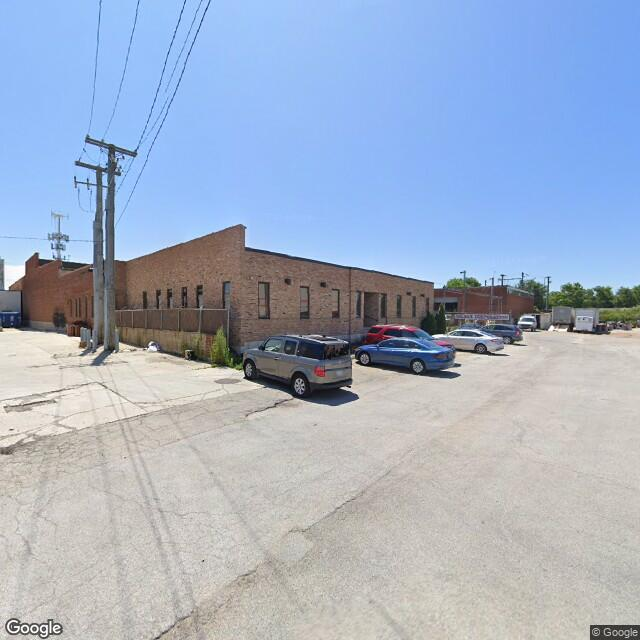

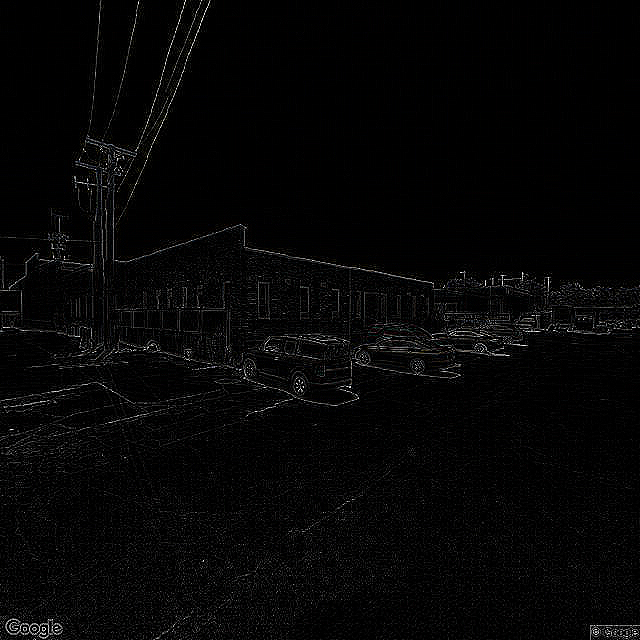

In [3]:
#Laplacian transformation:
laplacian = cv.Laplacian(input_image, cv.CV_8UC3)

# Display original and transformed images
cv2_imshow(input_image)
cv2_imshow(laplacian)